### Your name:

<pre> Your name here</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/TF/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Classification - Based on Week 3

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
  

In [2]:
### Your code here

## Feel free to use multiple cells
df = pd.read_excel("default_of_credit_card_clients.xls", 
                    skiprows= 1, header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
df_X = df.iloc[:,0:24].copy()
df_y = df.iloc[:,24].copy()
df_X.head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(test_size=0.3, random_state=42)
train_idx = None
test_valid_idx = None

for tr_idx, te_va_idx in strat_split.split(df_X,df_y):
    train_idx = tr_idx
    test_valid_idx = te_va_idx

df_X_train = df_X.loc[train_idx]
df_y_train = df_y.loc[train_idx]
df_X_test_valid = df_X.loc[te_va_idx]
df_y_test_valid = df_y.loc[te_va_idx]

strat_split = StratifiedShuffleSplit(test_size=0.5, random_state=42)
test_idx = None
valid_idx = None

for va_idx, te_idx in strat_split.split(df_X_test_valid,df_y_test_valid):
    valid_idx = va_idx
    test_idx = te_idx

df_X_valid = df_X_test_valid.iloc[valid_idx]
df_y_valid = df_y_test_valid.iloc[valid_idx]
df_X_test = df_X_test_valid.iloc[test_idx]
df_y_test = df_y_test_valid.iloc[test_idx]



In [5]:
print(df_X_train.shape)
print(df_X_test.shape)
print(df_X_valid.shape)

(21000, 24)
(4500, 24)
(4500, 24)


In [6]:
print('classd ratio:', df_y_valid.value_counts() / len(df_y_valid))
df_y.value_counts() / len(df_y)

classd ratio: 0    0.778667
1    0.221333
Name: default payment next month, dtype: float64


0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [7]:
X_names = list(df_X.columns) 
X_names

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## 1. Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.


  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?
- Is the feature importance consistent for all classifiers?

### 1.1 RandomForest

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=10,max_features=10,random_state=42,class_weight = "balanced")
RF_clf.fit(df_X_train,df_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

RF_clf_proba = cross_val_predict(RF_clf, df_X_train, df_y_train, cv=5, method="predict_proba")

fpr_RF, tpr_RF, thresholds_RF = roc_curve(df_y_train, RF_clf_proba[:,1])
RF_cross_val_roc_auc = roc_auc_score(df_y_train, RF_clf_proba[:,1])

print(RF_cross_val_roc_auc)


0.722078638022956


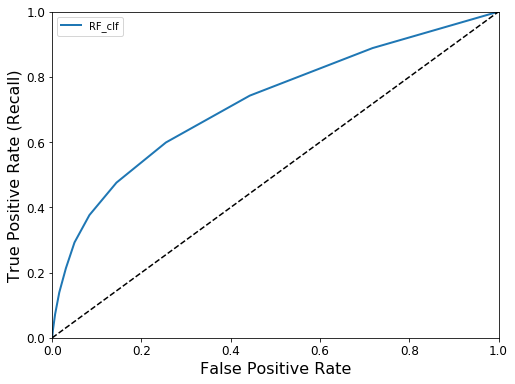

In [14]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RF_clf")
plt.show()

In [15]:
RF_test_roc_auc = roc_auc_score(df_y_test, RF_clf.predict_proba(df_X_test)[:,1])
RF_f1_cross_val = f1_score(df_y_train, RF_clf_proba[:,1]>=0.5)
RF_f1_test = f1_score(df_y_test, RF_clf.predict_proba(df_X_test)[:,1]>=0.5)
print("roc_auc_socre for test:", RF_test_roc_auc)

Performance_summary = pd.DataFrame({
    "Random_Forrest":[RF_cross_val_roc_auc, RF_test_roc_auc, RF_f1_cross_val, RF_f1_test]
})
Performance_summary

roc_auc_socre for test: 0.7307805790722515


,Random_Forrest
0,0.722079
1,0.730781
2,0.450690
3,0.474313


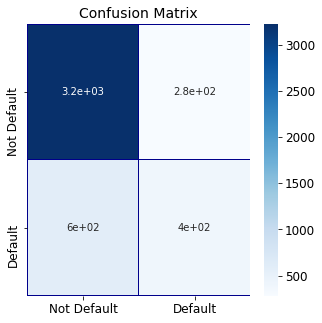

In [16]:
cm = confusion_matrix(df_y_test, RF_clf.predict_proba(df_X_test)[:,1]>=0.5)
# cm = confusion_matrix(df_y_train, RF_clf_proba[:,1]>=0.5)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

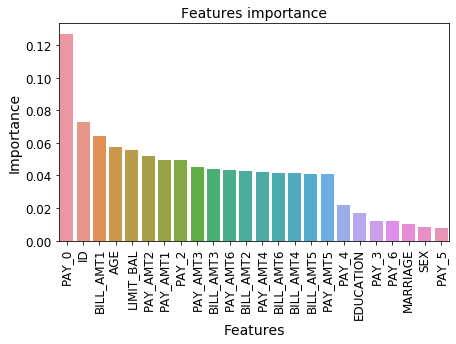

In [17]:
RF_feature_imp = RF_clf.feature_importances_
RF_FI =pd.DataFrame({"Features":X_names, "Importance":RF_feature_imp})
RF_FI = RF_FI.sort_values(by="Importance",ascending=False)

plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot("Features","Importance",data=RF_FI)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### 1.2 Adaboost Tree

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier(max_depth=3)
ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=100, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

ada_clf.fit(df_X_train,df_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [19]:
ada_clf_proba = cross_val_predict(ada_clf, df_X_train, df_y_train, cv=5, method="predict_proba")

fpr_ada, tpr_ada, thresholds_ada = roc_curve(df_y_train, ada_clf_proba[:,1])
ada_cross_val_roc_auc = roc_auc_score(df_y_train, ada_clf_proba[:,1])

print(ada_cross_val_roc_auc)


0.7382197995958218


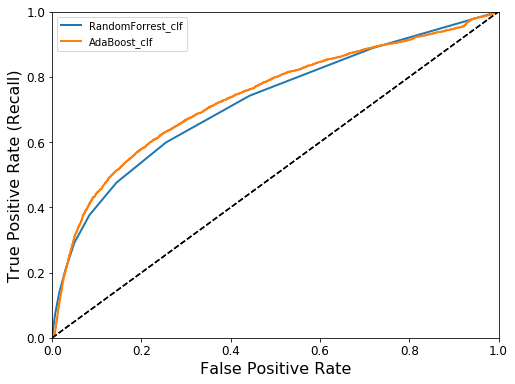

In [20]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RandomForrest_clf")
plot_roc_curve(fpr_ada, tpr_ada, "AdaBoost_clf")
plt.show()

In [21]:
ada_test_roc_auc = roc_auc_score(df_y_test, ada_clf.predict_proba(df_X_test)[:,1])
ada_f1_cross_val = f1_score(df_y_train, ada_clf_proba[:,1]>=0.5)
ada_f1_test = f1_score(df_y_test, ada_clf.predict_proba(df_X_test)[:,1]>=0.5)
print("roc_auc_socre for test:", ada_test_roc_auc)

Performance_summary = pd.DataFrame({
    "Random Forrest":[RF_cross_val_roc_auc, RF_test_roc_auc, RF_f1_cross_val, RF_f1_test],
    "AdaBoost Tree":[ada_cross_val_roc_auc, ada_test_roc_auc, ada_f1_cross_val, ada_f1_test]
})
Performance_summary

roc_auc_socre for test: 0.7701453057011162


,Random Forrest,AdaBoost Tree
0,0.722079,0.738220
1,0.730781,0.770145
2,0.450690,0.439215
3,0.474313,0.462136


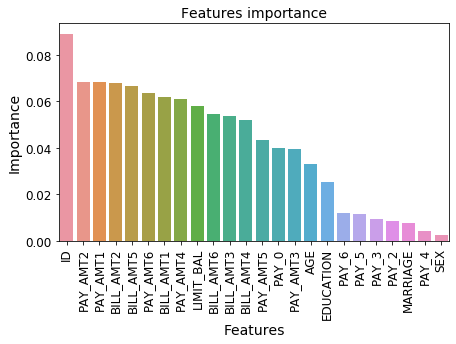

In [22]:
ada_feature_imp = ada_clf.feature_importances_
ada_FI =pd.DataFrame({"Features":X_names, "Importance":ada_feature_imp})
ada_FI = ada_FI.sort_values(by="Importance",ascending=False)

plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot("Features","Importance",data=ada_FI)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### 1.3 Extra Trees

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

ET_clf = ExtraTreesClassifier(n_estimators = 100, random_state=42, class_weight="balanced")
ET_clf.fit(df_X_train,df_y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [24]:
ET_clf_proba = cross_val_predict(ET_clf,df_X_train,df_y_train,cv=5,method="predict_proba")

fpr_ET, tpr_ET, thresholds_ET = roc_curve(df_y_train,ET_clf_proba[:,1])
ET_cross_val_roc_auc = roc_auc_score(df_y_train,ET_clf_proba[:,1])
print(ET_cross_val_roc_auc)

0.756302984211647


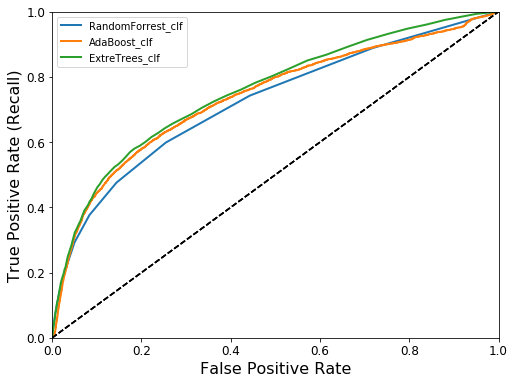

In [25]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RandomForrest_clf")
plot_roc_curve(fpr_ada, tpr_ada, "AdaBoost_clf")
plot_roc_curve(fpr_ET, tpr_ET, "ExtreTrees_clf")
plt.show()

In [26]:
ET_test_roc_auc = roc_auc_score(df_y_test, ET_clf.predict_proba(df_X_test)[:,1])
ET_f1_cross_val = f1_score(df_y_train, ET_clf_proba[:,1]>=0.5)
ET_f1_test = f1_score(df_y_test, ET_clf.predict_proba(df_X_test)[:,1]>=0.5)
print("roc_auc_socre for test:", ET_test_roc_auc)

Performance_summary = pd.DataFrame({
    "Random Forrest":[RF_cross_val_roc_auc, RF_test_roc_auc, RF_f1_cross_val, RF_f1_test],
    "AdaBoost Tree":[ada_cross_val_roc_auc, ada_test_roc_auc, ada_f1_cross_val, ada_f1_test],
    "Extra Trees":[ET_cross_val_roc_auc, ET_test_roc_auc, ET_f1_cross_val, ET_f1_test]
})
Performance_summary

roc_auc_socre for test: 0.7655105771367536


,Random Forrest,AdaBoost Tree,Extra Trees
0,0.722079,0.738220,0.756303
1,0.730781,0.770145,0.765511
2,0.450690,0.439215,0.448062
3,0.474313,0.462136,0.481742


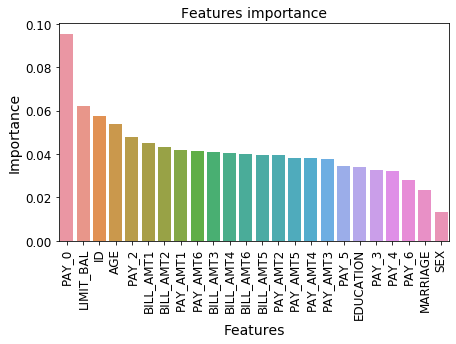

In [27]:
ET_feature_imp = ET_clf.feature_importances_
ET_FI =pd.DataFrame({"Features":X_names, "Importance":ET_feature_imp})
ET_FI = ET_FI.sort_values(by="Importance",ascending=False)

plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot("Features","Importance",data=ET_FI)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### 1.4 Gradient Boosted Tree classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(n_estimators = 100, random_state=42, learning_rate=0.1)
GB_clf.fit(df_X_train,df_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
GB_clf_proba = cross_val_predict(GB_clf,df_X_train,df_y_train,cv=5,method="predict_proba")

fpr_GB, tpr_GB, thresholds_GB = roc_curve(df_y_train,GB_clf_proba[:,1])
GB_cross_val_roc_auc = roc_auc_score(df_y_train,GB_clf_proba[:,1])
print(GB_cross_val_roc_auc)

0.7744328655217476


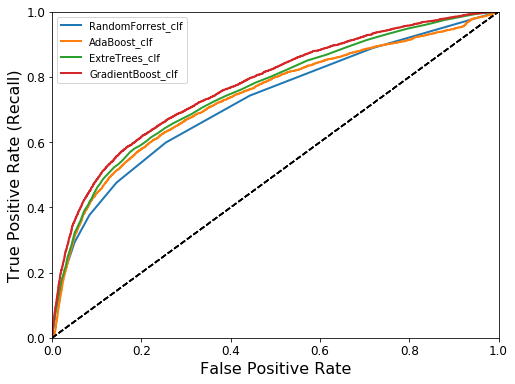

In [30]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RandomForrest_clf")
plot_roc_curve(fpr_ada, tpr_ada, "AdaBoost_clf")
plot_roc_curve(fpr_ET, tpr_ET, "ExtreTrees_clf")
plot_roc_curve(fpr_GB, tpr_GB, "GradientBoost_clf")
plt.show()

In [31]:
GB_test_roc_auc = roc_auc_score(df_y_test, GB_clf.predict_proba(df_X_test)[:,1])
GB_f1_cross_val = f1_score(df_y_train, GB_clf_proba[:,1]>=0.5)
GB_f1_test = f1_score(df_y_test, GB_clf.predict_proba(df_X_test)[:,1]>=0.5)
print("roc_auc_socre for test:", GB_test_roc_auc)

Performance_summary = pd.DataFrame({
    "Random Forrest":[RF_cross_val_roc_auc, RF_test_roc_auc, RF_f1_cross_val, RF_f1_test],
    "AdaBoost Tree":[ada_cross_val_roc_auc, ada_test_roc_auc, ada_f1_cross_val, ada_f1_test],
    "Extra Trees":[ET_cross_val_roc_auc, ET_test_roc_auc, ET_f1_cross_val, ET_f1_test],
    "Gradient Booset":[GB_cross_val_roc_auc, GB_test_roc_auc, GB_f1_cross_val, GB_f1_test]
})
Performance_summary

roc_auc_socre for test: 0.7953433357945218


,Random Forrest,AdaBoost Tree,Extra Trees,Gradient Booset
0,0.722079,0.738220,0.756303,0.774433
1,0.730781,0.770145,0.765511,0.795343
2,0.450690,0.439215,0.448062,0.466629
3,0.474313,0.462136,0.481742,0.501299


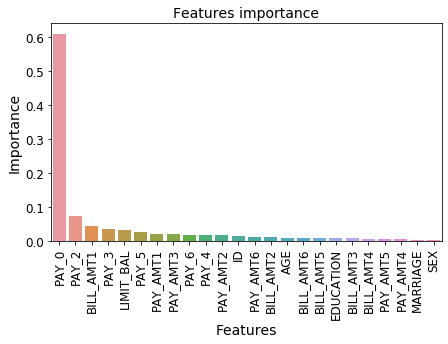

In [32]:
GB_feature_imp = GB_clf.feature_importances_
GB_FI =pd.DataFrame({"Features":X_names, "Importance":GB_feature_imp})
GB_FI = GB_FI.sort_values(by="Importance",ascending=False)

plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot("Features","Importance",data=GB_FI)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### 1.5 Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
LR_clf.fit(df_X_train,df_y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
LR_clf_proba = cross_val_predict(LR_clf,df_X_train,df_y_train,cv=5,method="predict_proba")

fpr_LR, tpr_LR, thresholds_LR = roc_curve(df_y_train,LR_clf_proba[:,1])
LR_cross_val_roc_auc = roc_auc_score(df_y_train, LR_clf_proba[:,1])
print(LR_cross_val_roc_auc)

0.6500100337012577


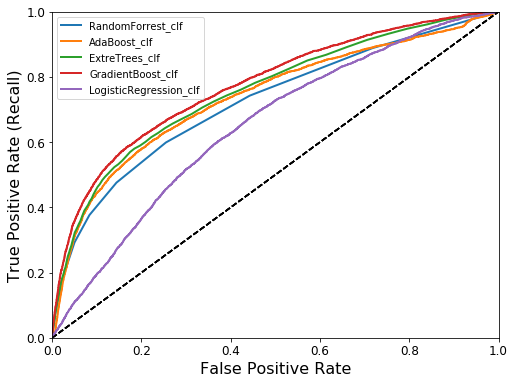

In [35]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RandomForrest_clf")
plot_roc_curve(fpr_ada, tpr_ada, "AdaBoost_clf")
plot_roc_curve(fpr_ET, tpr_ET, "ExtreTrees_clf")
plot_roc_curve(fpr_GB, tpr_GB, "GradientBoost_clf")
plot_roc_curve(fpr_LR, tpr_LR, "LogisticRegression_clf")
plt.show()

In [36]:
LR_test_roc_auc = roc_auc_score(df_y_test, LR_clf.predict_proba(df_X_test)[:,1])
LR_f1_cross_val = f1_score(df_y_train, LR_clf_proba[:,1]>=0.5)
LR_f1_test = f1_score(df_y_test, LR_clf.predict_proba(df_X_test)[:,1]>=0.5)
print("roc_auc_socre for test:", LR_test_roc_auc)

Performance_summary = pd.DataFrame({
    "Random Forrest":[RF_cross_val_roc_auc, RF_test_roc_auc, RF_f1_cross_val, RF_f1_test],
    "AdaBoost Tree":[ada_cross_val_roc_auc, ada_test_roc_auc, ada_f1_cross_val, ada_f1_test],
    "Extra Trees":[ET_cross_val_roc_auc, ET_test_roc_auc, ET_f1_cross_val, ET_f1_test],
    "Gradient Booset":[GB_cross_val_roc_auc, GB_test_roc_auc, GB_f1_cross_val, GB_f1_test],
    "Loggistic Regression":[LR_cross_val_roc_auc, LR_test_roc_auc, LR_f1_cross_val, LR_f1_test]
})
Performance_summary

roc_auc_socre for test: 0.6706367787582707


,Random Forrest,AdaBoost Tree,Extra Trees,Gradient Booset,Loggistic Regression
0,0.722079,0.738220,0.756303,0.774433,0.650010
1,0.730781,0.770145,0.765511,0.795343,0.670637
2,0.450690,0.439215,0.448062,0.466629,0.416620
3,0.474313,0.462136,0.481742,0.501299,0.422626


## 2. Stack Models


- Stack your models. 
  - Combine the models from the previous section using the stacking approach: 
    - Choose the model use to combine. Examples are:
      - Linear Regression
      - Logistic Regression

In [40]:
from sklearn.ensemble import VotingClassifier

VC_clf = VotingClassifier(
    estimators=[('GB', GB_clf), ('RF', RF_clf), ('Extra Trees', ET_clf)],
    voting='soft')

In [42]:
VC_clf.fit(df_X_valid, df_y_valid)

VotingClassifier(estimators=[('GB',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                              

In [44]:
VC_test_roc_auc = roc_auc_score(df_y_test, VC_clf.predict_proba(df_X_test)[:,1])
VC_test_roc_auc

0.7770117348511458

## 3. Down sample

In [119]:
from sklearn.utils import resample

df_train = df.loc[train_idx]
default_majority = df_train[df_train['default payment next month']==0]
default_minority = df_train[df_train['default payment next month']==1]
default_majority.shape
df_majority_downsampled = resample(default_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=default_minority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results
df_train_downsampled = pd.concat([default_minority, df_majority_downsampled])
df_train_downsampled['default payment next month'].value_counts()

1    4645
0    4645
Name: default payment next month, dtype: int64

In [54]:
df_train = df.loc[train_idx]

default_majority = df_train[df_train['default payment next month']==0]
default_minority = df_train[df_train['default payment next month']==1]
default_majority.shape
df_minority_upsampled = resample(default_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=default_majority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results
df_train_upsampled = pd.concat([default_majority, df_minority_upsampled])
df_train_upsampled['default payment next month'].value_counts()

1    16355
0    16355
Name: default payment next month, dtype: int64

In [120]:
df_X_train_ds = df_train_downsampled.iloc[:,0:24].copy()
df_y_train_ds = df_train_downsampled.iloc[:,24].copy()
df_y_train_ds.head(-5)

18221    1
494      1
13904    1
15580    1
17363    1
        ..
7441     0
12245    0
9505     0
495      0
7043     0
Name: default payment next month, Length: 9285, dtype: int64

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf_ds = GradientBoostingClassifier(n_estimators = 100, random_state=42, learning_rate=0.1)
GB_clf_ds.fit(df_X_train_ds,df_y_train_ds)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
GB_clf_ds_proba = cross_val_predict(GB_clf_ds,df_X_train_ds,df_y_train_ds,cv=5,method="predict_proba")

fpr_GB_ds, tpr_GB_ds, thresholds_GB_ds = roc_curve(df_y_train_ds,GB_clf_ds_proba[:,1])
GB_cross_val_roc_auc_ds = roc_auc_score(df_y_train_ds,GB_clf_ds_proba[:,1])
print(GB_cross_val_roc_auc_ds)

0.8006425569335819


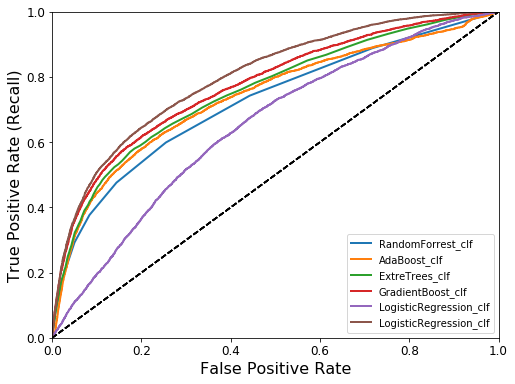

In [62]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "RandomForrest_clf")
plot_roc_curve(fpr_ada, tpr_ada, "AdaBoost_clf")
plot_roc_curve(fpr_ET, tpr_ET, "ExtreTrees_clf")
plot_roc_curve(fpr_GB, tpr_GB, "GradientBoost_clf")
plot_roc_curve(fpr_LR, tpr_LR, "LogisticRegression_clf")
plot_roc_curve(fpr_GB_ds, tpr_GB_ds, "LogisticRegression_clf")
plt.show()

In [63]:
test_roc_auc = roc_auc_score(df_y_test, GB_clf_ds.predict_proba(df_X_test)[:,1])
test_roc_auc

0.7973059305084624

## 4. Questions

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

`answer here`:Yes, to reduce regularization

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

`answer here`: No, DT does not care

Q. (Optional) What is the difference between hard and soft voting classifiers?

`answer here`: 

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

`answer here`: increase learning rate; reduce regularizations for hyperparams in base estimator; increase n_estimators

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

`answer here`: early stop to find best n_estimators; decrease learning rate

## 5. Using Deep Learning

In [337]:
import tensorflow as tf
import numpy as np
import sklearn
from tensorflow import keras

In [338]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
neuron_num=50

model = keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=(24,)),
        keras.layers.Dense(neuron_num,activation="elu",kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(neuron_num,activation="elu",kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(),
#          keras.layers.Dense(neuron_num,activation="elu",kernel_initializer="he_normal"),
#         keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid",kernel_initializer="glorot_normal")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 24)                96        
_________________________________________________________________
dense (Dense)                (None, 50)                1250      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 4,347
Trainable params: 4,099
Non-trainable params: 248
____________________________________________________

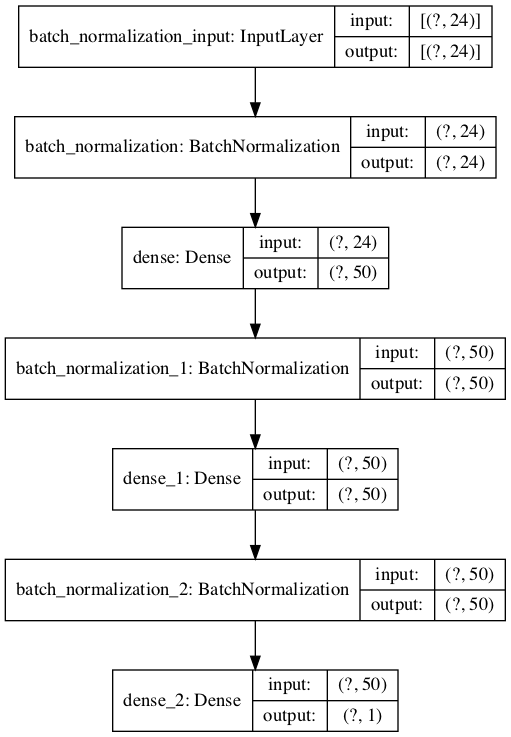

In [339]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [340]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss = "binary_crossentropy",
              optimizer = optimizer,
              metrics = ["accuracy"]
)

In [341]:
from sklearn.utils import class_weight
 

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(df_y_train.values),
                                                 df_y_train)
class_weights/np.sum(class_weights)*10

array([2.21190476, 7.78809524])

In [342]:
patience = 10
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,restore_best_weights=True)

In [343]:
df_y_train.value_counts()
# class_weights = [{0: 1,
#                 1: 3.52}]
# class_weight=class_weights
# callbacks=[early_stopping_cb]
history = model.fit(df_X_train,df_y_train,epochs=100,batch_size=1200,validation_data=(df_X_valid,df_y_valid),
                    class_weight=class_weights,callbacks=[early_stopping_cb])

Train on 21000 samples, validate on 4500 samples
Epoch 1/100
21000/21000 [==============================] - 1s 39us/sample - loss: 0.5632 - accuracy: 0.7372 - val_loss: 0.5592 - val_accuracy: 0.7893
Epoch 2/100
21000/21000 [==============================] - 0s 4us/sample - loss: 0.4525 - accuracy: 0.8101 - val_loss: 0.5534 - val_accuracy: 0.8078
Epoch 3/100
21000/21000 [==============================] - 0s 4us/sample - loss: 0.4428 - accuracy: 0.8143 - val_loss: 0.5066 - val_accuracy: 0.8122
Epoch 4/100
21000/21000 [==============================] - 0s 4us/sample - loss: 0.4392 - accuracy: 0.8168 - val_loss: 0.4818 - val_accuracy: 0.8133
Epoch 5/100
21000/21000 [==============================] - 0s 4us/sample - loss: 0.4338 - accuracy: 0.8170 - val_loss: 0.4864 - val_accuracy: 0.8162
Epoch 6/100
21000/21000 [==============================] - 0s 4us/sample - loss: 0.4327 - accuracy: 0.8154 - val_loss: 0.4620 - val_accuracy: 0.8198
Epoch 7/100
21000/21000 [==============================]

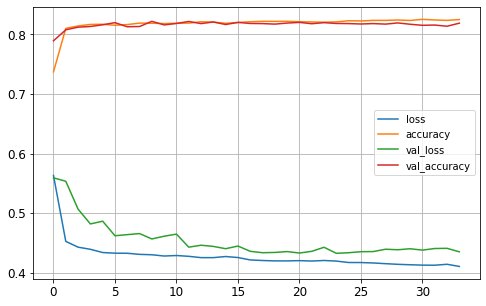

In [344]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1000)
plt.show()

In [345]:
y_pred_test = model.predict_classes(df_X_test)
y_pred_train = model.predict_classes(df_X_train)
y_pred_valid = model.predict_classes(df_X_valid)

unique, counts = np.unique(y_pred_test, return_counts=True)
dict(zip(unique, counts))


{0: 4001, 1: 499}

In [346]:
df_y_test.value_counts()

0    3505
1     995
Name: default payment next month, dtype: int64

In [347]:
from sklearn.metrics import roc_auc_score


y_pred_proba_test = model.predict(df_X_test)
y_pred_proba_train = model.predict(df_X_train)
y_pred_proba_valid = model.predict(df_X_valid)

print("AUC socre train:", roc_auc_score(df_y_train,y_pred_proba_train))
print("AUC socre valid:", roc_auc_score(df_y_valid,y_pred_proba_valid))
print("AUC socre test:", roc_auc_score(df_y_test,y_pred_proba_test))


AUC socre train: 0.8015730829591948
AUC socre valid: 0.7776207570006051
AUC socre test: 0.7867740987390591


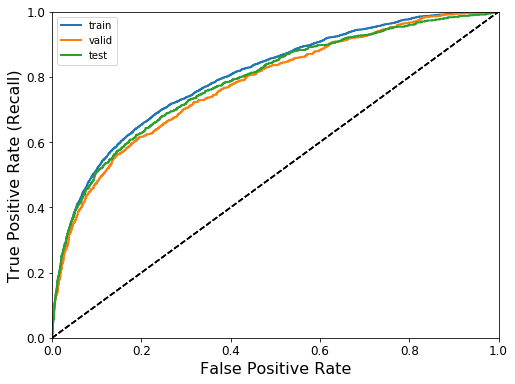

In [348]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.legend()



fpr_train, tpr_train, thresholds_train = roc_curve(df_y_train, y_pred_proba_train)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(df_y_valid, y_pred_proba_valid)
fpr_test, tpr_test, thresholds_test = roc_curve(df_y_test, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train,'train')
plot_roc_curve(fpr_valid, tpr_valid, 'valid')
plot_roc_curve(fpr_test, tpr_test, 'test')
plt.show()

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb


/bin/sh: jt: command not found
